<h1 style="color:#f0b904">Ex 4: Noise</h1>

<p>Here we will have to set-up the circuit to be run on an Actual IBM quantum computer instead of using a local simulator</p>

In [2]:
import qiskit
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2

service = QiskitRuntimeService()

In [ ]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1) # Apply CNOT to qbits 1 with 0 as control, meaning if q0 = 1, flip q1
qc.measure(0, 0)
qc.measure(1, 1)


# Check the queue and take the best one
backend = service.least_busy(operational=True, simulator=False)
print(f"Runing simulation on: {backend.name}")

# Transpile the circuit, aka, compile it for the specific Quantum device you are gonna use
qc_transpiled = transpile(qc, backend=backend, optimization_level=1)

print(f"Transpiling complete")
# qc_transpiled.draw(output="mpl")

In [ ]:
# Re compute if needed
#sampler = SamplerV2(mode=backend)
#job = sampler.run([qc_transpiled], shots=200) # 200 Shots is well enough and it avoids wasting Quantum-resources
#job_id = job.job_id()
#print(f"Job Id: {job_id}")

# Pre-computed: cvaatqtsgfsg008e7bqg
job = service.job('cvaatqtsgfsg008e7bqg')

result = job.result()
print("Job Done")

Result: {'11': 237, '00': 241, '01': 17, '10': 5}


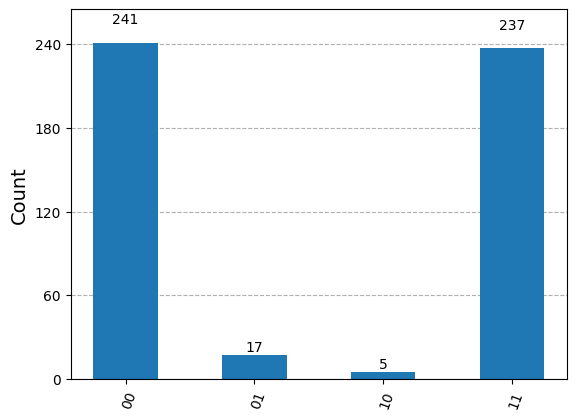

In [7]:
counts = result[0].data.c.get_counts()
print(f"Result: {counts}")
plot_histogram(counts)